# UTS Penambangan Data


**METODE NAIVE BAYES**

**Pengertian Naive Bayes**

Naïve Bayes Classifier merupakan sebuah metoda klasifikasi yang berakar pada teorema Bayes . Metode pengklasifikasian dg menggunakan metode probabilitas dan statistik yg dikemukakan oleh ilmuwan Inggris Thomas Bayes , yaitu memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes . Ciri utama dr Naïve Bayes Classifier ini adalah asumsi yg sangat kuat (naïf) akan independensi dari masing-masing kondisi / kejadian.

**Dasar Teorema Naive Bayes Classifier**

Teorema total probabilitas

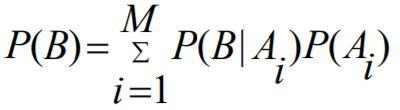

**Tahapan Algoritma Naive Bayes Classifier**

1. Baca data training
2. Hitung jumlah class
3. Hitung jumlah kasus yang sama dengan class yang sama
4. Kalikan semua nilai hasil sesuai dengan data X yang dicari class-nya

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
R2=pd.read_csv("https://raw.githubusercontent.com/Theresia028/Test-Git/master/dataR2.csv")

In [3]:
R2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
R2['Classification'].unique()

array([1, 2])

In [5]:
R2.describe(include='all')

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [6]:
R2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [7]:
R2.drop(columns="Age",inplace=True)

In [8]:
R2.isnull().sum()

BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [9]:
x=R2.iloc[:,0:4].values
y=R2.iloc[:,4].values

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score


#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
x_test

array([[ 21.47      ,  78.        ,   3.469     ,   0.6674356 ],
       [ 22.21      ,  86.        ,  36.94      ,   7.83620533],
       [ 24.21875   ,  86.        ,   3.73      ,   0.79125733],
       [ 25.9       ,  85.        ,   4.58      ,   0.96027333],
       [ 23.8       , 118.        ,   6.47      ,   1.88320133],
       [ 26.66666667, 201.        ,  41.611     ,  20.6307338 ],
       [ 30.8012487 ,  87.        ,  30.212     ,   6.4834952 ],
       [ 30.83653053, 128.        ,  41.894     ,  13.22733227],
       [ 33.18      ,  92.        ,   5.75      ,   1.30486667],
       [ 21.36752137,  78.        ,   2.64      ,   0.507936  ],
       [ 36.21227888, 101.        ,  15.533     ,   3.86978807],
       [ 23.12467037,  91.        ,   4.498     ,   1.00965107],
       [ 31.23140988, 131.        ,  30.13      ,   9.73600733],
       [ 32.27078777,  84.        ,   5.81      ,   1.203832  ],
       [ 32.5       ,  93.        ,   5.43      ,   1.245642  ],
       [ 29.296875  ,  98

In [14]:
x_test1 = x_test[1:2][0:]
x_test1

array([[22.21      , 86.        , 36.94      ,  7.83620533]])

In [15]:
y_test[1,]

22

In [16]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)

In [17]:
y_pred

array([  9,  46,  48,  24,  51, 111,  46,  60, 103,   9,  73,  20, 115,
        89,  59,  30,  65,  11,  27,   4,  58,  35, 113,  65,  98,  66,
        65,  41,  27, 115,  77,  40,   9,  97,  43])

In [18]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
accuracy_Naive Bayes: 0.000
precision_Naive Bayes: 0.000
recall_Naive Bayes: 0.000
f1-score_Naive Bayes : 0.000


**METODE POHON KEPUTUSAN DESISION TREE**

**Pengertian  Desision Tree**

Decision Tree adalah sebuah cara/pemikiran/pembuatan keputusan yang berbentuk sekumpulan simpul seperti pohon yang dapat memberikan suatu jawaban dari beberapa pilihan Tindakan. Biasanya decision tree dimulai dari satu node atau satu simpul. Kemudian node tersebut bercabang untuk memberikan pilihan-pilihan Tindakan yang lain. Selanjutnya node tersebut akan memiliki cabang-cabang baru. Dalam pembuatan node atau cabang baru akan terus di ulang sampai kriteria berhenti dipenuhi. Decision tree biasanya dapat memperoses dataset yang berisi atribut nominal atau numerik. Label attribute harus berbentuk nominal untuk proses klasifikasi dan berbentuk numerik untuk regresi.

**Langkah Metode Naive Bayes**

1. Menghitung jumlah kelas/label
2. Menghitung jumlah kasus perkelas
3. Mengalikan semua hasil variable kelas
4. Membandingkan hasil perkelas






In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
%matplotlib inline

In [20]:
import warnings

warnings.filterwarnings('ignore')

In [21]:
dataset_url="https://raw.githubusercontent.com/Theresia028/Test-Git/master/dataR2.csv"
df = pd.read_csv(dataset_url, index_col=0)

In [22]:
df.head()

,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,,,,,,,,,
48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 48 to 86
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BMI             116 non-null    float64
 1   Glucose         116 non-null    int64  
 2   Insulin         116 non-null    float64
 3   HOMA            116 non-null    float64
 4   Leptin          116 non-null    float64
 5   Adiponectin     116 non-null    float64
 6   Resistin        116 non-null    float64
 7   MCP.1           116 non-null    float64
 8   Classification  116 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 9.1 KB


In [24]:
col_names = ['BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'Classification']


for col in col_names:
    
    print(df[col].value_counts())   

21.367521    2
32.461911    2
27.688778    2
31.975015    2
31.250000    2
            ..
29.606767    1
34.422174    1
35.855815    1
36.790166    1
27.180000    1
Name: BMI, Length: 110, dtype: int64
92     9
90     6
87     4
77     4
103    4
97     4
83     4
82     4
101    4
86     4
85     4
93     3
102    3
89     3
98     3
84     3
95     3
100    3
88     3
94     3
105    2
99     2
112    2
134    2
131    2
70     2
78     2
106    2
196    1
119    1
152    1
108    1
104    1
91     1
118    1
128    1
139    1
199    1
76     1
60     1
75     1
201    1
114    1
116    1
80     1
79     1
74     1
110    1
96     1
138    1
Name: Glucose, dtype: int64
18.077    2
3.226     2
4.530     2
2.707     1
4.172     1
         ..
5.646     1
4.181     1
5.819     1
3.855     1
19.910    1
Name: Insulin, Length: 113, dtype: int64
0.467409    1
1.144780    1
3.071407    1
1.008511    1
2.871792    1
           ..
0.732193    1
5.091856    1
1.840410    1
2.534932    1
6.77736

In [25]:
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [26]:
# melakukan cek apabila terdapat missing values pada variabel

df.isnull().sum()

BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [27]:
#mendeklarasikan fitur vector dan target variabel

X = df.drop(['Classification'], axis=1)
y = df['Classification']

In [29]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [30]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((77, 8), (39, 8))

In [31]:
# melakukan cek tipe data pada X_train

X_train.dtypes

BMI            float64
Glucose          int64
Insulin        float64
HOMA           float64
Leptin         float64
Adiponectin    float64
Resistin       float64
MCP.1          float64
dtype: object

In [32]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [33]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [34]:
DecisionTreeClassifier(max_depth=3, random_state=0)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [35]:
y = df["Classification"]
X = df.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

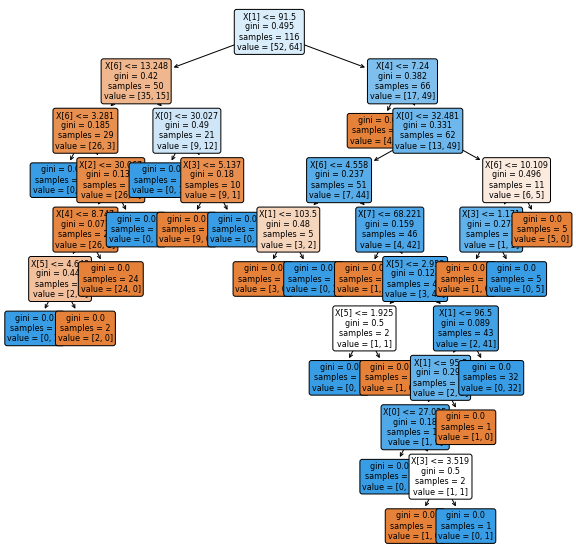

In [36]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()